# Diferencias finitas
---
Este método se aplica para resolver de forma numéricas ecuaciones como:

$$\frac{dC}{dt} = -\kappa C$$

Esto consiste en discretizar la ecuación definiendo un paso o salto $dt = \Delta t$

$$\frac{C_{n+1} - C_{n}}{\Delta t} = -\kappa C $$

Y finalmente despejar: $C_{n+1}$

Existen tres tipos de métodos para diferencias finitas:

> 1. Método explícito
> 2. Método implícito
> 3. Método híbrido 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Método explícito
---
Consiste en definir el termino $C$ de la derecha de como un $C_{n}$

$$\frac{C_{n+1} - C_{n}}{\Delta t} = -\kappa C_{n}$$

Y despejar:

$$C_{n+1} = (1 - \Delta t \kappa) C_{n}$$

La estabilidad de este método depende del tamaño del paso ($\delta t$). Debe cumplirse siempre que:

$$\delta t < \frac{1}{\kappa}$$

Donde $\kappa$ es una constante que multiplica a la variable de interés.

In [ ]:
explicito = lambda C_n, dt: (1 - k * dt) * C_n

Text(0.5, 1.0, 'Estabilidad del metodo explicito')

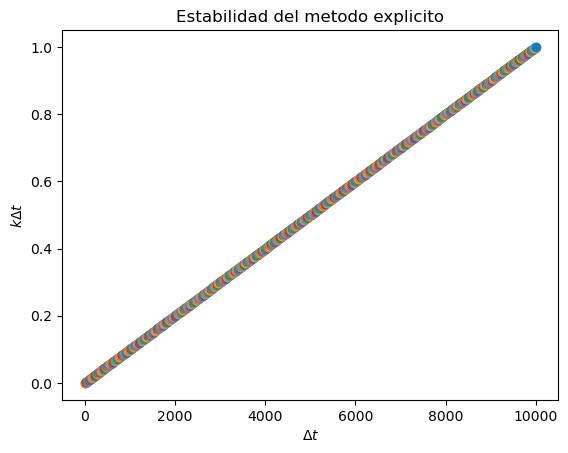

In [2]:
k = 1e-4 #1/s
dt = 0
k_dt = 0 # contador
k_delta_t = lambda dt: k*dt #s
while k_dt < 1:
    k_dt = k_delta_t(dt)
    plt.scatter(dt, k_dt)
    dt += 10
plt.ylabel(r'$k \Delta t$')
plt.xlabel(r'$\Delta t$')
plt.title('Estabilidad del metodo explicito')

La gráfica anterior muestra que valores puede tomar $\Delta t$ para que el método de diferencias finitas explicito sea estable $0 < \Delta t< 10000$

/tmp/ipykernel_8620/433097182.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gray', dt_list.shape[0])


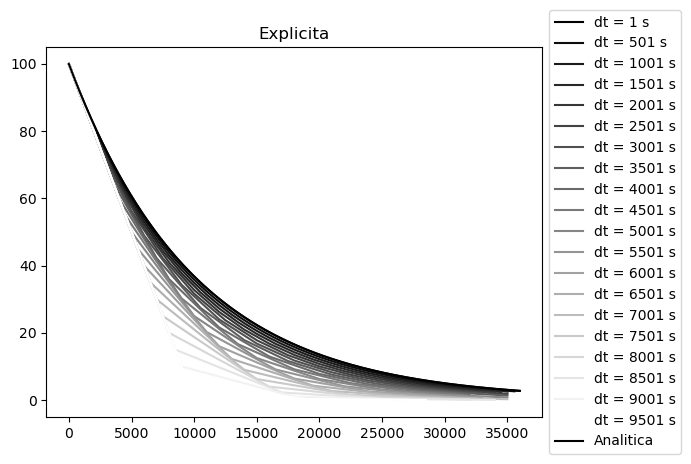

In [5]:
dt_list = np.arange(1, 10_000, 500) # s
max_t = 10 * 3600
ti = 0
# Create a figure and a single subplot
fig, ax = plt.subplots()
cmap = cm.get_cmap('gray', dt_list.shape[0])
for i, dt in enumerate(dt_list):
        range_t = np.arange(ti, max_t, dt)
        C_n  = [100]
        for t in range_t:
                C_n1 = explicito(C_n[-1], dt)
                C_n.extend([C_n1])
        ax.plot(range_t, C_n[:-1], label=f'dt = {dt} s', color= cmap(i))
range_t = np.arange(ti, max_t, 1)
ax.plot(range_t, analitico(range_t, 100), label=f'Analitica', color = 'k')
ax.set_title('Explicita')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Método implícito
---

Consiste en definir el termino $C$ de la derecha de como un $C_{n+1}$

$$\frac{C_{n+1} - C_{n}}{\Delta t} = -\kappa C_{n+1}$$

Y despejar:

$$C_{n+1} = \frac{C_{n}}{(1 + \Delta t \kappa)} $$


In [ ]:
implicito = lambda C_n, dt: (1/(1 + k * dt)) * C_n

/tmp/ipykernel_8620/1916749910.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gray', dt_list.shape[0])


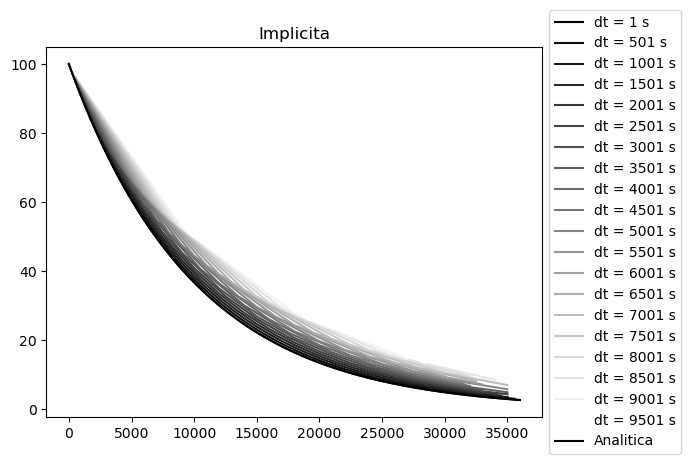

In [6]:
dt_list = np.arange(1, 10_000, 500) # s
max_t = 10 * 3600
ti = 0
# Create a figure and a single subplot
fig, ax = plt.subplots()
cmap = cm.get_cmap('gray', dt_list.shape[0])
for i, dt in enumerate(dt_list):
        range_t = np.arange(ti, max_t, dt)
        C_n  = [100]
        for t in range_t:
                C_n1 = implicito(C_n[-1], dt)
                C_n.extend([C_n1])
        ax.plot(range_t, C_n[:-1], label=f'dt = {dt} s', color= cmap(i))
range_t = np.arange(ti, max_t, 1)
ax.plot(range_t, analitico(range_t, 100), label=f'Analitica', color = 'k')
ax.set_title('Implicita')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Híbrido
---

En este se utiliza un parámetro $\alpha$ para definir que tan explicito o implícito se quiere que sea el método híbrido:

$$\frac{C_{n+1 - C_{n}}}{\Delta t} = -\alpha \kappa C_{n+1} - (1-\alpha)\kappa C_{n}$$

Despejamos $C_{n+1}$:

$$C_{n+1} = \frac{(1 - (1 - \alpha)  k  \Delta t)}{(1 + \alpha k \Delta t)} C_{n}$$

El parámetro $1 > \alpha > 0$ 

In [4]:
hibrido = lambda C_n, dt, alpha: ((1 - (1 - alpha) * k * dt)/(1 + alpha * k * dt)) * C_n

Ahora comparemos los tres tipos de esquemas respecto a la función analítica.

In [ ]:
analitico = np.vectorize(lambda t, C_n: C_n * np.exp(- k * t))

/tmp/ipykernel_8620/2120415396.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gray', dt_list.shape[0])


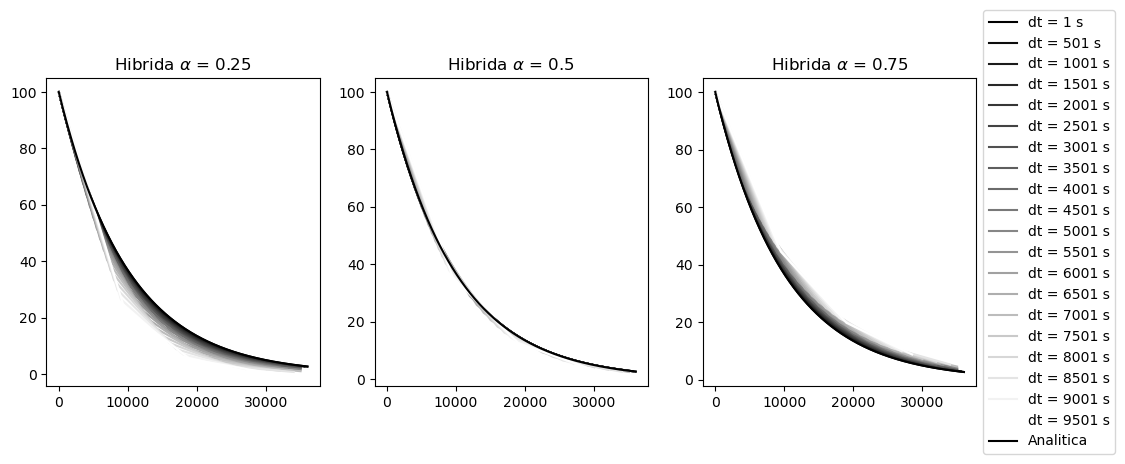

In [13]:
dt_list = np.arange(1, 10_000, 500) # s
max_t = 10 * 3600
ti = 0
alphas = [0.25, 0.5, 0.75]
# Create a figure and a single subplot
fig, axs = plt.subplots(1, len(alphas), figsize=(12, 4))
cmap = cm.get_cmap('gray', dt_list.shape[0])
for i, alf in enumerate(alphas):
        for j, dt in enumerate(dt_list):
                range_t = np.arange(ti, max_t, dt)
                C_n  = [100]
                for t in range_t:
                        C_n1 = hibrido(C_n[-1], dt, alf)
                        C_n.extend([C_n1])
                axs[i].plot(range_t, C_n[:-1], label=f'dt = {dt} s', color= cmap(j))
        range_t = np.arange(ti, max_t, 1)
        axs[i].plot(range_t, analitico(range_t, 100), label=f'Analitica', color = 'k')
        axs[i].set_title(r'Hibrida $\alpha$ = {}'.format(alf))
axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))